In [113]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

top200 = "datasets/Top200.csv"
topgenre = "datasets/Top10000genre.csv"

top200_df = pd.read_csv(top200)
topgenre_df = pd.read_csv(topgenre)

top200_df = top200_df.drop(columns=['Index','Song ID','Chord','Valence','Duration (ms)','Tempo','Liveness','Acousticness','Speechiness'])
topgenre_df = topgenre_df.drop(columns=['track_id','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence'])
# genre = []
# genre = (pd.unique(topgenre_df['genre']))
# genre200 = []
# genre200 = (pd.unique(top200_df['Genre']))
# genre200

top200_df.columns
top200_df.Genre.value_counts()
# pop_genre = top200_df[top200_df['Genre'].str.contains('pop')]
# pop_genre = top200_df[(top200_df['Genre'].str.contains('pop')) & (top200_df['Genre'].str.len()<2)]
top200_df.Genre= top200_df.Genre.str.replace('[','')
top200_df.Genre= top200_df.Genre.str.replace(']','')
top200_df.Genre = top200_df.Genre.str.split(',')
top200_df = top200_df.explode('Genre')
top200_df.Genre = top200_df.Genre.str.replace("\'", "")

# top200_df.head()


# topgenre_df.info()


<ipython-input-113-bd9e0bf0844e>:24: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  top200_df.Genre= top200_df.Genre.str.replace('[','')
<ipython-input-113-bd9e0bf0844e>:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  top200_df.Genre= top200_df.Genre.str.replace(']','')


In [114]:
# #sorting music for specific genre
# pop_genre = top200_df[top200_df.Genre=='pop']
# hiphop_genre = top200_df[top200_df.Genre=='hip hop']
# rap_genre = top200_df[top200_df.Genre=='rap']
# pop_genre.shape[0]


In [115]:
#sorting music for word included (contains overlap)
pop_any = top200_df[top200_df.Genre.str.contains('pop')]
hiphop_any = top200_df[top200_df.Genre.str.contains('hip hop')]
rap_any = top200_df[top200_df.Genre.str.contains('rap')]
rb_any = top200_df[top200_df.Genre.str.contains('r&b')]
country_any = top200_df[top200_df.Genre.str.contains('country')]
rock_any = top200_df[top200_df.Genre.str.contains('rock')]
alt_any = top200_df[top200_df.Genre.str.contains('alternative')]
dance_any = top200_df[top200_df.Genre.str.contains('dance')]
edm_any = top200_df[top200_df.Genre.str.contains('edm')]
# house_any = top200_df[top200_df.Genre.str.contains('house')]
# come back and group rest of unique categories
jazz_any = top200_df[top200_df.Genre.str.contains('jazz')]
indie_any = top200_df[top200_df.Genre.str.contains('indie')]
itl_any = top200_df[top200_df.Genre.str.contains('italiano')]
span_any = top200_df[top200_df.Genre.str.contains('reggaeton')]
trap_any = top200_df[top200_df.Genre.str.contains('trap')]
latin_any = top200_df[top200_df.Genre.str.contains('latin')]
trap_any = top200_df[top200_df.Genre.str.contains('trap')]

In [116]:
#setting other category 

genre_list = ['pop','hip hop','rap','r&b','country','rock','alternative','dance','edm','jazz','indie','italiano','reggaeton','trap','latin']
pattern = '|'.join(genre_list)
result = top200_df.loc[~(top200_df['Genre'].str.contains(pattern, case=False))]
other = result
other_genre = (pd.unique(result['Genre']))


In [117]:
# genre = (pd.unique(top200_df['Genre']))
# genre

In [118]:
# 2020 to 2021 genre comparison bar chart
top200_df.head(0)

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness


Text(0, 0.5, 'Highest Charting Position')

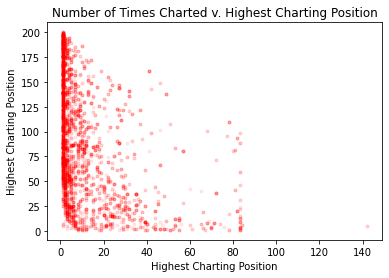

In [119]:
#  number of times charted v. number of times streamed (scatter plot)
# # number of time charted v. highest charting position (scatter plot)
# # Number of Times Charted: The number of times that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.

x_axis = top200_df['Number of Times Charted']
# y_axis = top200_df['Highest Charting Position']
y_axis = top200_df['Highest Charting Position']

plt.scatter(x_axis, y_axis, marker='.', facecolors="red", alpha=0.08)
plt.title("Number of Times Charted v. Highest Charting Position")
plt.xlabel("Highest Charting Position")
plt.ylabel("Highest Charting Position")
# plt.ylabel("Highest")

In [120]:
# outlier = (top200_df['Number of Times Charted'] >= 140)
# outlier
# min_streams = top200_df['Streams'].min()
# max_streams = top200_df['Streams'].max()
# print(min_streams, max_streams)

# top200_df['Streams'].describe()

top200_df.Streams = top200_df.Streams.str.replace('"', '')
top200_df.Streams = top200_df.Streams.str.replace(',', '')

top200_df["Streams"] = top200_df[["Streams"]].apply(pd.to_numeric)
top200_df.head()



4176083 48633449


In [121]:
min_streams = top200_df['Streams'].min()
max_streams = top200_df['Streams'].max()
print(min_streams, max_streams)


4176083 48633449
